In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import glob
from scipy import stats

In [416]:
### 폴더 내의 해외 주식이름.csv 파일을 가져와서, lunage 범위별로 나눔(7일 or 15일)
### 각 범위별로 나눈 1년치 값들을 각각 구함(수익률 평균mean or 수익률 합계sum)

### 수익률 평균(또는 `합계)

# csv 파일로 저장 및 그래프로 출력

In [417]:
path = 'foreign_lunage/'
file_list=[]
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)

### 각 나라별 매년 수익률차이가 0보다 클 확률 binom_test p-value 사전 분석 (newmoon - fullmoon)

In [239]:
def days_15_years(df):
    '''
     years 별로 평균을 구해서 반환함.
     (새로운달 횟수 - 보름달 횟수/ 전체 횟수)에 이용
     우연인지 아닌지 판단. 50보다 높으면 우연이 아닐 확률이 높음
     지속성의 척도로 사용할 예정.
     binomial tests
     '''
    df_fullmoon = df[(7.4 < df.lunage) & (df.lunage<= 22.2)]#월령 7.4 ~ 22.2 (full moon)
    df_newmoon = df[(7.4 >= df.lunage) | (df.lunage > 22.2)] #월령 22.2 ~ 7.4 까지 (new moon)

    years = (df_fullmoon.date / 10000).round().astype(int)
    years.name = 'years'
    df_fullmoon = pd.concat([df_fullmoon, years], axis=1).dropna().reset_index(drop=True)

    years = (df_newmoon.date / 10000).round().astype(int)
    years.name = 'years'
    df_newmoon = pd.concat([df_newmoon, years], axis=1).dropna().reset_index(drop=True)

    newmoon_mean = df_newmoon['log_change_rate'].groupby(df_newmoon['years']).mean()
    fullmoon_mean = df_fullmoon['log_change_rate'].groupby(df_fullmoon['years']).mean()
    return fullmoon_mean, newmoon_mean

In [240]:
def days_15_analysis(df):
    '''
    데이터를 넣으면 stats.ttest_ind 를 사용하여 t 값을 구해줌. 
    pvalue 도 구해줌
    newmoon과 fullmoon 별로 describe 도 구해줌
    '''
    print('---alldata---\n',df.log_change_rate.describe())
    
    df_fullmoon = df[(7.4 < df.lunage) & (df.lunage<= 22.2)]#월령 7.4 ~ 22.2 (full moon)
    df_newmoon = df[(7.4 >= df.lunage) | (df.lunage > 22.2)] #월령 22.2~ 7.4까지 (new moon)
    
    print('\n---newmoon---\n',df_newmoon.log_change_rate.describe())
    print('\n---fullmoon---\n',df_fullmoon.log_change_rate.describe())
    
    print('\n---t-test---\n',stats.ttest_ind(df_newmoon.log_change_rate,df_fullmoon.log_change_rate))
    return df_fullmoon, df_newmoon

In [241]:
def days_7_analysis(df):
    '''
    데이터를 넣으면 stats.ttest_ind 를 사용하여 t 값을 구해줌. 
    pvalue 도 구해줌
    newmoon과 fullmoon 별로 describe 도 구해줌
    '''
    print('---alldata---\n',df.log_change_rate.describe())
    
    df_fullmoon = df[(11.1 < df.lunage) & (df.lunage<= 18.5)]#월령 7.4 ~ 22.2 (full moon)
    df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 22.2 ~ 7.4 까지 (new moon)
    
    print('\n---newmoon---\n',df_newmoon.log_change_rate.describe())
    print('\n---fullmoon---\n',df_fullmoon.log_change_rate.describe())
    
    print('\n---t-test---\n',stats.ttest_ind(df_newmoon.log_change_rate,df_fullmoon.log_change_rate))
    return df_fullmoon, df_newmoon

In [242]:
def days_7_years(df):
    '''
     years 별로 평균을 구해서 반환함.
     (새로운달 횟수 - 보름달 횟수/ 전체 횟수)에 이용
     우연인지 아닌지 판단. 50보다 높으면 우연이 아닐 확률이 높음
     지속성의 척도로 사용할 예정.
     binomial tests
     '''
    df_fullmoon = df[(11.1 < df.lunage) & (df.lunage<= 18.5)]#월령 7.4 ~ 22.2 (full moon)
    df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 22.2 ~ 7.4 까지 (new moon)

    years = (df_fullmoon.date / 10000).round().astype(int)
    years.name = 'years'
    df_fullmoon = pd.concat([df_fullmoon, years], axis=1).dropna().reset_index(drop=True)

    years = (df_newmoon.date / 10000).round().astype(int)
    years.name = 'years'
    df_newmoon = pd.concat([df_newmoon, years], axis=1).dropna().reset_index(drop=True)

    newmoon_mean = df_newmoon['log_change_rate'].groupby(df_newmoon['years']).mean()
    fullmoon_mean = df_fullmoon['log_change_rate'].groupby(df_fullmoon['years']).mean()
    return fullmoon_mean, newmoon_mean

In [243]:
df_fullmoon, df_newmoon = days_7_analysis(df)

---alldata---
 count    2577.000000
mean        0.053892
std         1.129362
min        -7.523100
25%        -0.514800
50%         0.060900
75%         0.629700
max        15.990000
Name: log_change_rate, dtype: float64

---newmoon---
 count    644.000000
mean       0.105465
std        1.034697
min       -4.151500
25%       -0.477150
50%        0.105950
75%        0.631175
max        4.974600
Name: log_change_rate, dtype: float64

---fullmoon---
 count    623.000000
mean      -0.008791
std        1.106931
min       -6.008400
25%       -0.557050
50%        0.002400
75%        0.596150
max        4.829600
Name: log_change_rate, dtype: float64

---t-test---
 Ttest_indResult(statistic=1.8987128310820904, pvalue=0.05782961584175871)


In [244]:
df = pd.read_csv(file_list[0])
fullmoon_mean, newmoon_mean = days_7_years(df) # years 별로 평균을 구해서 반환함.(새로운달 횟수 - 보름달 횟수/ 전체 횟수)에 이용
moon_mean_data = pd.DataFrame({'newmoon_mean':newmoon_mean,'fullmoon_mean':fullmoon_mean })

In [245]:
x = moon_mean_data[newmoon_mean - fullmoon_mean > 0 ].count()[0] # x: 검정통계량. 1이 나온 횟수 = 0이상의 수익률
n = moon_mean_data.count()[0] # 총 시도 횟수

In [246]:
stats.binom_test(x, n)

0.22656250000000003

In [247]:
stats.binom_test(600, 1000)

2.7284641560671857e-10

In [173]:
stats.binom_test(20, 40)

1.0

In [168]:
stats.binom_test(6, 10)

0.7539062500000002

In [292]:
stats.binom_test(x, n, p=0.5, alternative='two-sided')

0.22656250000000003

# 전세계 일별 수익률 평균을 구한 뒤 boxplot(15일, 7일 간격) - 보름달 vs 새로운 달

In [235]:
def days_15(file_list):
    '''
    달을 15일로 나눔
    '''
    newmoon_mean_dic = {}
    fullmoon_mean_dic = {}
    
    for name in file_list:
        df = pd.read_csv(name)
        
        df_newmoon = df[(df.lunage <= 7.4) | (df.lunage > 22.2)] #월령 22.2 ~ 7.4 까지 (new moon)
        df_fullmoon = df[(7.4 < df.lunage) & (df.lunage<= 22.2)]#월령 7.4 ~ 22.2 (full moon)

        years = (df_fullmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_fullmoon = pd.concat([df_fullmoon, years], axis=1).dropna().reset_index(drop=True)

        years = (df_newmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_newmoon = pd.concat([df_newmoon, years], axis=1).dropna().reset_index(drop=True)

        df_newmoon_change_rate = df_newmoon.set_index(['itemcode','years']).log_change_rate
        df_fullmoon_change_rate = df_fullmoon.set_index(['itemcode','years']).log_change_rate

        #newmoon_sum_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).sum()[0]
        #fullmoon_sum_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).sum()[0]
        
        newmoon_mean_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).mean()[0]
        fullmoon_mean_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).mean()[0]
    
    return fullmoon_mean_dic, newmoon_mean_dic

def days_7(file_list):
    '''
    달을 7일 단위로 나눔.
    '''
    newmoon_mean_dic = {}
    fullmoon_mean_dic = {}
    
    for name in file_list:
        df = pd.read_csv(name)
        
        df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 25.9 ~ 3.7 까지 (new moon)
        df_fullmoon = df[(11.1 < df.lunage) & (df.lunage<= 18.5)]#월령 7.4 ~ 22.2 (full moon)


        years = (df_fullmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_fullmoon = pd.concat([df_fullmoon, years], axis=1).dropna().reset_index(drop=True)

        years = (df_newmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_newmoon = pd.concat([df_newmoon, years], axis=1).dropna().reset_index(drop=True)

        df_newmoon_change_rate = df_newmoon.set_index(['itemcode','years']).log_change_rate
        df_fullmoon_change_rate = df_fullmoon.set_index(['itemcode','years']).log_change_rate

        #newmoon_sum_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).sum()[0]
        #fullmoon_sum_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).sum()[0]
        
        newmoon_mean_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).mean()[0]
        fullmoon_mean_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).mean()[0]
    
    return fullmoon_mean_dic, newmoon_mean_dic

In [236]:
#파일 가져오기
path = 'foreign_lunage/'
file_list=[]
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)

In [237]:
days15_fullmoon_mean, days15_newmoon_mean = days_15(file_list)
days7_fullmoon_mean, days7_newmoon_mean = days_7(file_list)
days15 = pd.DataFrame({'fullmoon(15days)':days15_fullmoon_mean, 'newmoon(15days)':days15_newmoon_mean})
days7 = pd.DataFrame({'fullmoon(7days)':days7_fullmoon_mean, 'newmoon(7days)':days7_newmoon_mean})

In [238]:
days = pd.concat([days15, days7],sort=False, axis=1)

In [239]:
days

,fullmoon(15days),newmoon(15days),fullmoon(7days),newmoon(7days)
BRI@BVSP,0.037241,0.031127,0.057928,0.049990
HAS@HNX,0.047835,0.025608,0.030882,0.096458
HSI@HSI,-0.008176,0.053606,-0.011565,0.097050
IDI@JKSE,0.055212,0.060310,0.079521,0.113028
INI@BSE30,0.017906,0.089352,-0.008791,0.105465
ITI@FTSEMIB,-0.033149,0.032034,-0.018893,0.062645
KOSPI,0.017290,0.026835,0.034202,0.073710
LNS@FTSE100,0.009150,0.025181,0.038816,0.053114
MYI@KLSE,0.010055,0.038008,0.036996,0.076328
NII@NI225,-0.012097,0.076505,-0.007267,0.124172


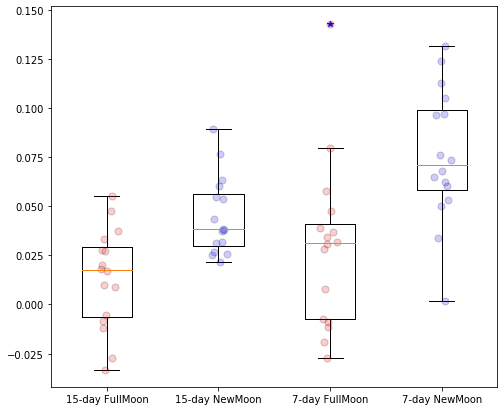

In [241]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.boxplot([days['fullmoon(15days)'], days['newmoon(15days)'], days['fullmoon(7days)'],days['newmoon(7days)']], sym="b*")
# plt.title('15day and 7day windows daily log change rate country')
plt.xticks([1, 2, 3, 4], ['15-day FullMoon', '15-day NewMoon', '7-day FullMoon', '7-day NewMoon'])
for i,d in enumerate(days):
    y = days[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, mfc = ["red","blue","red",'blue'][i], mec='k', ms=7, marker="o", linestyle="None",alpha = 0.2)
plt.show()

In [242]:
days.mean()

fullmoon(15days)    0.013594
newmoon(15days)     0.044868
fullmoon(7days)     0.028976
newmoon(7days)      0.075773
dtype: float64

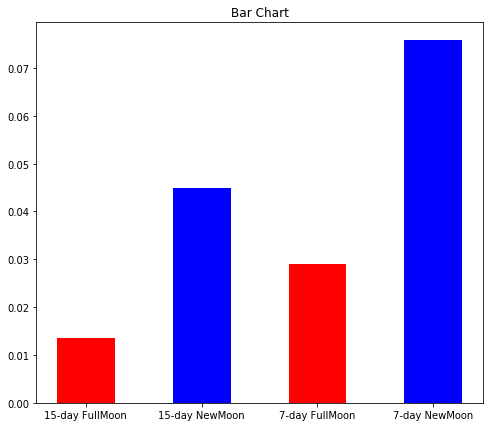

In [243]:
fig, ax = plt.subplots(figsize=(8, 7))
# xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(['15-day FullMoon', '15-day NewMoon', '7-day FullMoon', '7-day NewMoon'], days.mean(), width=0.5,color=['r','b'])
#plt.xticks(x, xlabel)
# plt.xlabel("가나다")
# plt.ylabel("cont")
plt.show()

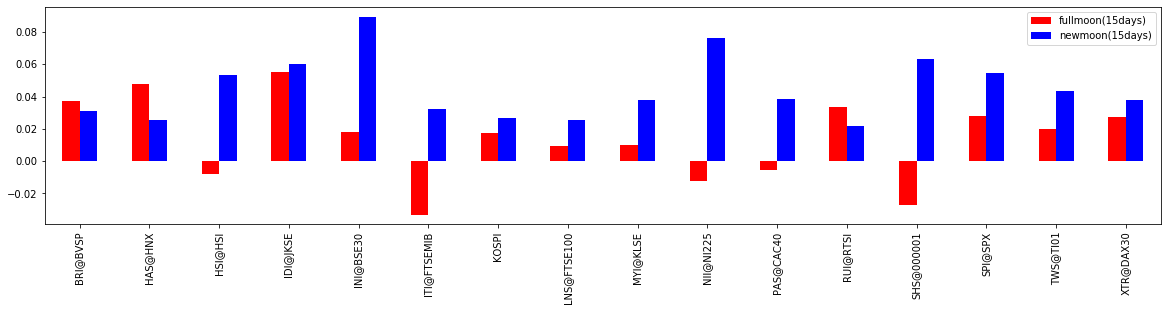

In [244]:
days.loc[:,['fullmoon(15days)', 'newmoon(15days)']].plot(kind='bar',figsize=(20,4),color=['red','blue'])

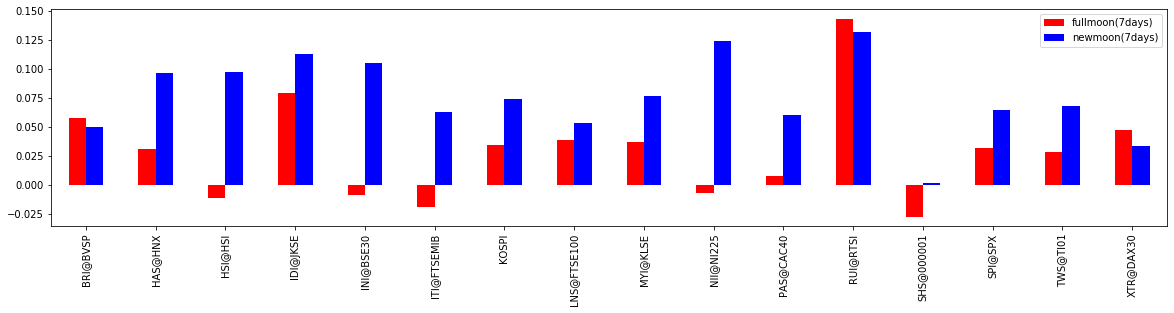

In [245]:
days.loc[:,['fullmoon(7days)', 'newmoon(7days)']].plot(kind='bar',figsize=(20,4),color=['red','blue'])

# 전세계 일별 수익률 평균을 구한 뒤 boxplot(7일 간격) - 상현달 vs 새로운 달 vs 보름달 vs 하현달

In [253]:
#파일 가져오기
path = 'foreign_lunage/'
file_list=[]
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)

In [254]:
def days_7(file_list):
    newmoon_dic = {}
    fullmoon_dic = {}
    rightmoon_dic = {}
    leftmoon_dic = {}
    
    
    for name in file_list:
        df = pd.read_csv(name)
        df_rightmoon = df[(3.7 < df.lunage) & (df.lunage<= 11.1)]#월령 3.7 ~ 11.1 (right moon)
        df_fullmoon = df[(11.1 < df.lunage) & (df.lunage<= 18.5)]#월령 11.1 ~ 18.5 (full moon)
        df_leftmoon = df[(18.5 < df.lunage) & (df.lunage<= 25.9)]#월령 18.5 ~ 25.9 (left moon)
        df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 25.9 ~ 3.7 까지 (new moon)

        years = (df_fullmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_fullmoon = pd.concat([df_fullmoon, years], axis=1).dropna().reset_index(drop=True)

        years = (df_newmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_newmoon = pd.concat([df_newmoon, years], axis=1).dropna().reset_index(drop=True)
        
        years = (df_rightmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_rightmoon = pd.concat([df_rightmoon, years], axis=1).dropna().reset_index(drop=True)
        
        years = (df_leftmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_leftmoon = pd.concat([df_leftmoon, years], axis=1).dropna().reset_index(drop=True)
        
        
        df_rightmoon_change_rate = df_rightmoon.set_index(['itemcode','years']).log_change_rate
        df_leftmoon_change_rate = df_leftmoon.set_index(['itemcode','years']).log_change_rate
        df_newmoon_change_rate = df_newmoon.set_index(['itemcode','years']).log_change_rate
        df_fullmoon_change_rate = df_fullmoon.set_index(['itemcode','years']).log_change_rate

        
#         newmoon_sum_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).sum()[0]
#         fullmoon_sum_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).sum()[0]
#         newmoon_sum_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).sum()[0]
#         fullmoon_sum_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).sum()[0]
#         leftmoon_sum_dic[df.itemcode.unique()[0]]=df_leftmoon_change_rate.groupby(level=0).sum()[0]
#         rightmoon_sum_dic[df.itemcode.unique()[0]]=df_rightmoon_change_rate.groupby(level=0).sum()[0]
        
    
        newmoon_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).mean()[0]
        fullmoon_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).mean()[0]
        leftmoon_dic[df.itemcode.unique()[0]]=df_leftmoon_change_rate.groupby(level=0).mean()[0]
        rightmoon_dic[df.itemcode.unique()[0]]=df_rightmoon_change_rate.groupby(level=0).mean()[0]

        
        
    
    return rightmoon_dic, fullmoon_dic, newmoon_dic, leftmoon_dic

In [263]:
days7

,rigntmoon(7days),fullmoon(7days),leftmoon(7days),newmoon(7days)
BRI@BVSP,-0.031416,0.057928,0.061317,0.049990
HAS@HNX,0.007830,0.030882,0.015073,0.096458
HSI@HSI,-0.031494,-0.011565,0.036488,0.097050
IDI@JKSE,0.040004,0.079521,0.003952,0.113028
INI@BSE30,0.064926,-0.008791,0.051989,0.105465
ITI@FTSEMIB,-0.025541,-0.018893,-0.020858,0.062645
KOSPI,-0.002060,0.034202,-0.015951,0.073710
LNS@FTSE100,-0.023125,0.038816,0.000009,0.053114
MYI@KLSE,0.005269,0.036996,-0.018904,0.076328
NII@NI225,-0.018237,-0.007267,0.030217,0.124172


In [272]:
days7_rightmoon_mean, days7_fullmoon_mean, days7_newmoon_mean,days7_leftmoon_mean = days_7(file_list)
days7 = pd.DataFrame({'rightmoon(7days)': days7_rightmoon_mean, 'fullmoon(7days)':days7_fullmoon_mean, 'leftmoon(7days)':days7_leftmoon_mean,'newmoon(7days)':days7_newmoon_mean})

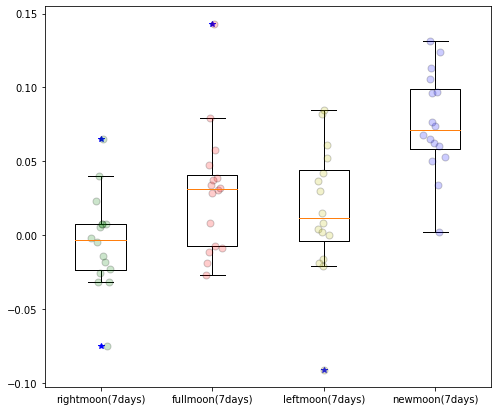

In [273]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.boxplot([days7['rightmoon(7days)'], days7['fullmoon(7days)'],days7['leftmoon(7days)'], days7['newmoon(7days)'] ], sym="b*")
plt.xticks([1, 2, 3, 4], ['rightmoon(7days)', 'fullmoon(7days)', 'leftmoon(7days)', 'newmoon(7days)'])
for i,d in enumerate(days7):
    y = days7[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, mfc = ['g','r','y','b'][i], mec='k', ms=7, marker="o", linestyle="None",alpha = 0.2)
plt.show()

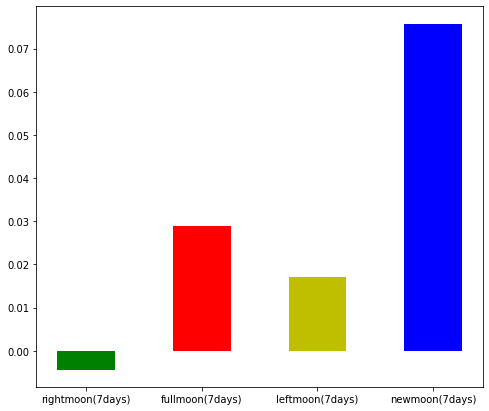

In [274]:
fig, ax = plt.subplots(figsize=(8, 7))
# xlabel = ['가', '나', '다']
plt.bar(['rightmoon(7days)', 'fullmoon(7days)', 'leftmoon(7days)', 'newmoon(7days)'], days7.mean(), width=0.5,color=['g','r','y','b'])
#plt.xticks(x, xlabel)
# plt.xlabel("가나다")
# plt.ylabel("cont")
plt.show()

# 전세계 일별 수익률 평균을 구한 뒤 boxplot(7일 간격) - 상현달 vs 새로운 달

In [275]:
def days_7(file_list):
    newmoon_dic = {}
    fullmoon_dic = {}
    rightmoon_dic = {}
    leftmoon_dic = {}
    
    
    for name in file_list:
        df = pd.read_csv(name)
        df_rightmoon = df[(3.7 < df.lunage) & (df.lunage<= 11.1)]#월령 3.7 ~ 11.1 (right moon)
        df_fullmoon = df[(11.1 < df.lunage) & (df.lunage<= 18.5)]#월령 11.1 ~ 18.5 (full moon)
        df_leftmoon = df[(18.5 < df.lunage) & (df.lunage<= 25.9)]#월령 18.5 ~ 25.9 (left moon)
        df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 25.9 ~ 3.7 까지 (new moon)

        years = (df_fullmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_fullmoon = pd.concat([df_fullmoon, years], axis=1).dropna().reset_index(drop=True)

        years = (df_newmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_newmoon = pd.concat([df_newmoon, years], axis=1).dropna().reset_index(drop=True)
        
        years = (df_rightmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_rightmoon = pd.concat([df_rightmoon, years], axis=1).dropna().reset_index(drop=True)
        
        years = (df_leftmoon.date / 10000).round().astype(int)
        years.name = 'years'
        df_leftmoon = pd.concat([df_leftmoon, years], axis=1).dropna().reset_index(drop=True)
        
        
        df_rightmoon_change_rate = df_rightmoon.set_index(['itemcode','years']).log_change_rate
        df_leftmoon_change_rate = df_leftmoon.set_index(['itemcode','years']).log_change_rate
        df_newmoon_change_rate = df_newmoon.set_index(['itemcode','years']).log_change_rate
        df_fullmoon_change_rate = df_fullmoon.set_index(['itemcode','years']).log_change_rate

        
#         newmoon_sum_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).sum()[0]
#         fullmoon_sum_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).sum()[0]
#         newmoon_sum_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).sum()[0]
#         fullmoon_sum_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).sum()[0]
#         leftmoon_sum_dic[df.itemcode.unique()[0]]=df_leftmoon_change_rate.groupby(level=0).sum()[0]
#         rightmoon_sum_dic[df.itemcode.unique()[0]]=df_rightmoon_change_rate.groupby(level=0).sum()[0]
        
    
        newmoon_dic[df.itemcode.unique()[0]]=df_newmoon_change_rate.groupby(level=0).mean()[0] * 100
        fullmoon_dic[df.itemcode.unique()[0]]=df_fullmoon_change_rate.groupby(level=0).mean()[0] * 100
        leftmoon_dic[df.itemcode.unique()[0]]=df_leftmoon_change_rate.groupby(level=0).mean()[0] * 100
        rightmoon_dic[df.itemcode.unique()[0]]=df_rightmoon_change_rate.groupby(level=0).mean()[0] * 100

        
        
    
    return rightmoon_dic, fullmoon_dic, newmoon_dic, leftmoon_dic

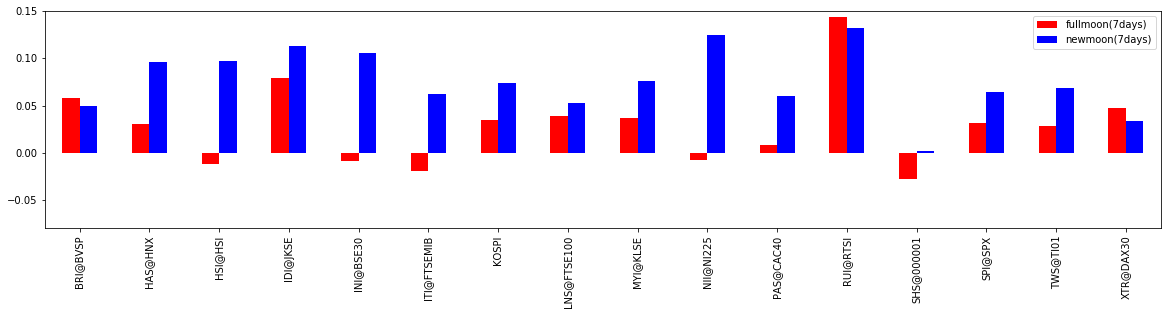

In [277]:
days7.loc[:,['fullmoon(7days)', 'newmoon(7days)']].plot(kind='bar',figsize=(20,4),color=['r','blue'],ylim=(-0.08,0.15))

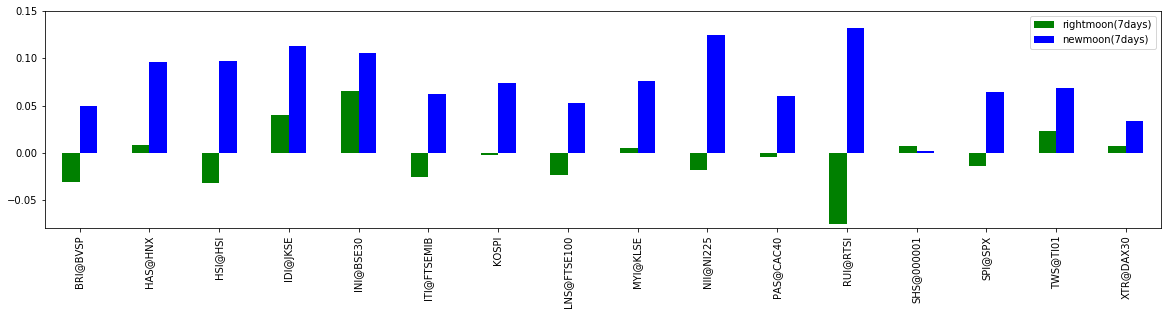

In [279]:
days7.loc[:,['rightmoon(7days)', 'newmoon(7days)']].plot(kind='bar',figsize=(20,4),color=['g','blue'],ylim=(-0.08, 0.15))

# 2d 그래프 그리기

In [284]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [285]:
df = days7.drop(['rightmoon(7days)','leftmoon(7days)'], axis=1)

In [287]:
df.drop(['BRI@BVSP','HAS@HNX', 'IDI@JKSE', 'LNS@FTSE100','SPI@SPX','XTR@DAX30','RUI@RTSI','TWS@TI01'])

,fullmoon(7days),newmoon(7days)
HSI@HSI,-0.011565,0.097050
INI@BSE30,-0.008791,0.105465
ITI@FTSEMIB,-0.018893,0.062645
KOSPI,0.034202,0.073710
MYI@KLSE,0.036996,0.076328
NII@NI225,-0.007267,0.124172
PAS@CAC40,0.008031,0.060209
SHS@000001,-0.027196,0.002017


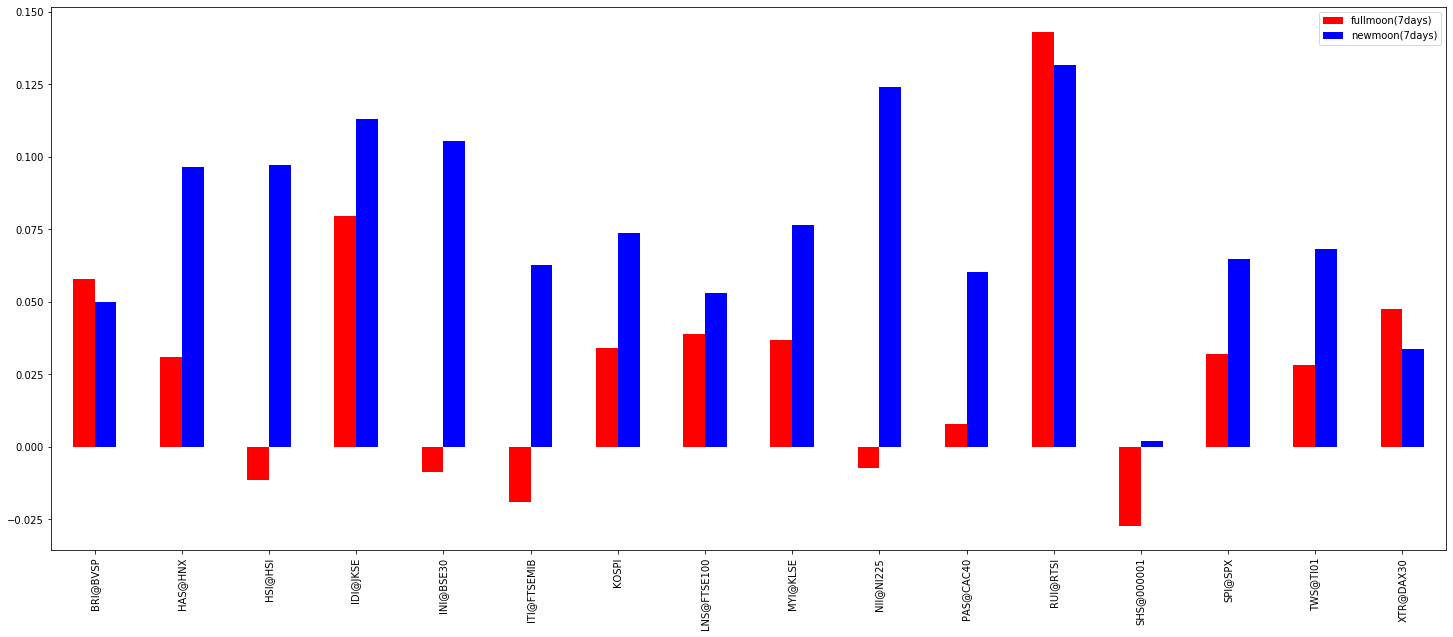

In [288]:
df.plot(kind='bar',figsize=(25,10),color=['red','blue'])

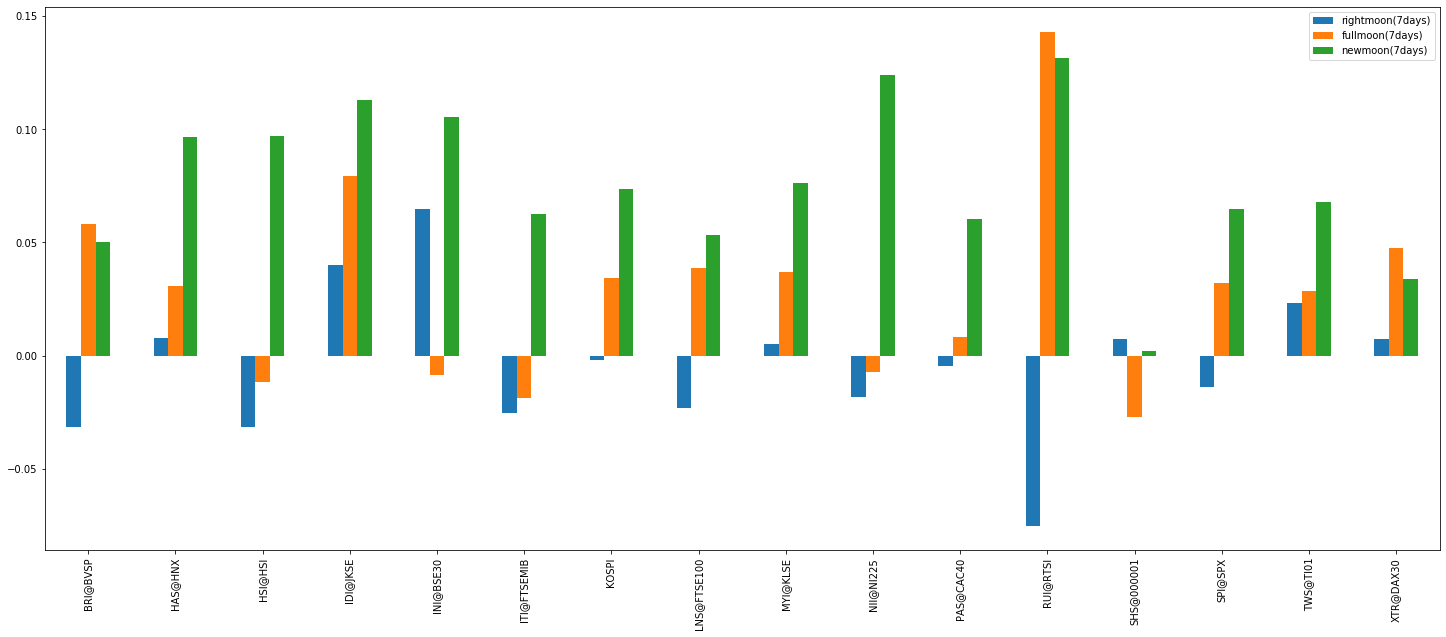

In [289]:
days7.drop(['leftmoon(7days)'], axis=1).plot(kind='bar',figsize=(25,10))

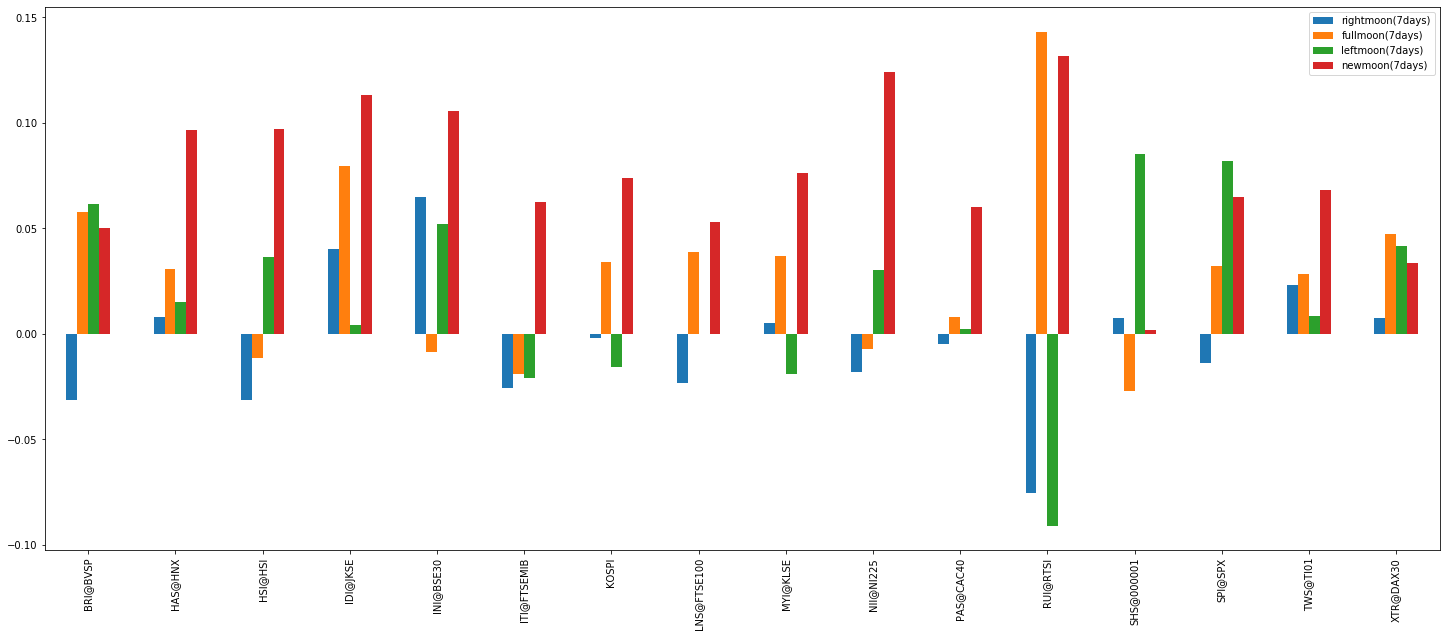

In [290]:
days7.plot(kind='bar',figsize=(25,10))